### CASA0002_Urban simulation
# Review of centrality measures in weighted networks
---

Elsa Arcaute, Valentina Marin 

February 2022

## Centrality
Nodes within a network can play different roles and have different levels of importance. Centrality measures help determine what these roles are. In this sense, a single measure cannot capture “importance”, since this is determined with respect to a specific situation/problem at hand. For example, a person might be very important in leading a group of people, but very bad at mediating conflict bewtween groups, and a different member of the community might be needed for this role. In general, one finds division of roles. We aim at identifying these roles through centrality measures in networks.

Some examples of centrality measures are:

* Degree centrality
* Eigenvector centrality
* Katz Centrality
* Closeness centrality
* Betweeness centrality

See lectures for the definitions. Within this section we will review __degree, closeness__ and __betweenness centrality__.

For clarity we will use an example of a made-up social network. I asked my then 8 years old son Yaan to construct a small immediate network of people important for his dad. How? build a list of person 1| person 2| weight, where the weight is a number between 1 and 10 relating to the importance of the relationship, 10 being the highest.

In [2]:
import pandas as pd

# Read in the edgelist file from csv
file_network = pd.read_csv("network_dad.csv")

# Print data (first five rows)
file_network.head()

,node1,node2,weight
0,Yaan,dad,10
1,Yaan,mum,10
2,Yaan,Abu,10
3,mum,Abu,10
4,dad,Abu,9


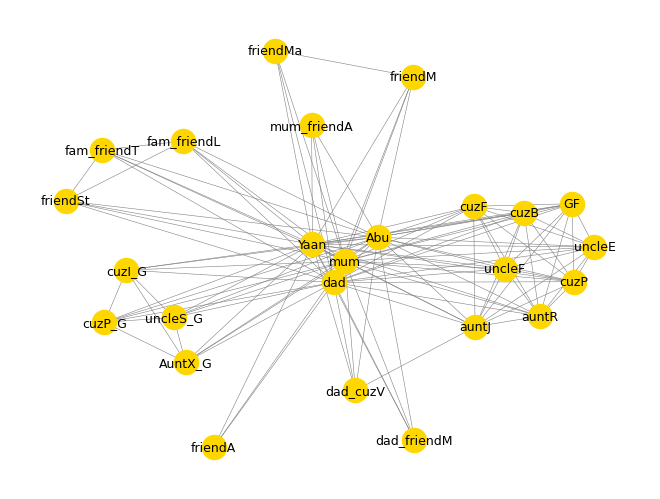

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph object
g_dad = nx.from_pandas_edgelist(file_network, 'node1', 'node2','weight')

# Plot graph
nx.draw(g_dad,
        with_labels = True,
        node_color='gold',
        font_size=9,
        font_color='black',
        edge_color='gray',
        width=0.4)


In [4]:
# Print information about the Graph
print(g_dad)

Graph with 25 nodes and 126 edges


In [5]:
# To check edges attributes:
list(g_dad.edges(data = True))[0:10]

# Other way to do it: 
# list(g_dad.edges.data())[0:10]

[('Yaan', 'dad', {'weight': 10}),
 ('Yaan', 'mum', {'weight': 10}),
 ('Yaan', 'Abu', {'weight': 10}),
 ('Yaan', 'friendM', {'weight': 10}),
 ('Yaan', 'dad_cuzV', {'weight': 9}),
 ('Yaan', 'cuzF', {'weight': 10}),
 ('Yaan', 'GF', {'weight': 9}),
 ('Yaan', 'cuzB', {'weight': 10}),
 ('Yaan', 'cuzI_G', {'weight': 10}),
 ('Yaan', 'cuzP_G', {'weight': 10})]

In [6]:
# To check node attributes:
list(g_dad.nodes(data = True))[0:10]

# Nodes do not have assigned attributes for now, then we will see all the centrality measures per node

[('Yaan', {}),
 ('dad', {}),
 ('mum', {}),
 ('Abu', {}),
 ('friendM', {}),
 ('dad_cuzV', {}),
 ('cuzF', {}),
 ('GF', {}),
 ('cuzB', {}),
 ('cuzI_G', {})]

Plotting the network in this way does not give us enough information. Let us compute some centrality measures and make sense of this network.

## __Degree centrality__

The degree of a node refers to the number of links connected to it. Let us plot the network again including this new piece of information:

In [7]:
#Let us compute the degree centrality
deg_dad=nx.degree(g_dad)

# Print degree as list: 
list(deg_dad)[0:10]

[('Yaan', 24),
 ('dad', 23),
 ('mum', 23),
 ('Abu', 22),
 ('friendM', 5),
 ('dad_cuzV', 5),
 ('cuzF', 11),
 ('GF', 11),
 ('cuzB', 11),
 ('cuzI_G', 7)]

In [8]:
# Print degree as dictionary:
dict(deg_dad)

{'Yaan': 24,
 'dad': 23,
 'mum': 23,
 'Abu': 22,
 'friendM': 5,
 'dad_cuzV': 5,
 'cuzF': 11,
 'GF': 11,
 'cuzB': 11,
 'cuzI_G': 7,
 'cuzP_G': 7,
 'AuntX_G': 7,
 'cuzP': 11,
 'auntR': 11,
 'uncleF': 11,
 'uncleE': 11,
 'auntJ': 12,
 'friendA': 3,
 'mum_friendA': 4,
 'uncleS_G': 7,
 'dad_friendM': 4,
 'fam_friendL': 6,
 'fam_friendT': 6,
 'friendSt': 6,
 'friendMa': 4}

In [9]:
# Let us add the degree data as attribute to the nodes in the graph
# Data needs to be in the form of dictionary, in which nodes are the keys and attibutes are the values.
nx.set_node_attributes(g_dad,dict(deg_dad),'degree')

# To check nodes attributes
list(g_dad.nodes(data=True))[0:10]

[('Yaan', {'degree': 24}),
 ('dad', {'degree': 23}),
 ('mum', {'degree': 23}),
 ('Abu', {'degree': 22}),
 ('friendM', {'degree': 5}),
 ('dad_cuzV', {'degree': 5}),
 ('cuzF', {'degree': 11}),
 ('GF', {'degree': 11}),
 ('cuzB', {'degree': 11}),
 ('cuzI_G', {'degree': 7})]

In [10]:
# Return degree attributes that we will use for the colour of nodes 
deg_color=[(node['degree']) for i, node in g_dad.nodes(data=True)]

print(deg_color)

[24, 23, 23, 22, 5, 5, 11, 11, 11, 7, 7, 7, 11, 11, 11, 11, 12, 3, 4, 7, 4, 6, 6, 6, 4]


In [11]:
# For setting node size based on degree values

deg_size=[(float(node['degree'])/max(deg_color)*1000) for i, node in g_dad.nodes(data=True)]

print(deg_size)

[1000.0, 958.3333333333334, 958.3333333333334, 916.6666666666666, 208.33333333333334, 208.33333333333334, 458.3333333333333, 458.3333333333333, 458.3333333333333, 291.6666666666667, 291.6666666666667, 291.6666666666667, 458.3333333333333, 458.3333333333333, 458.3333333333333, 458.3333333333333, 500.0, 125.0, 166.66666666666666, 291.6666666666667, 166.66666666666666, 250.0, 250.0, 250.0, 166.66666666666666]


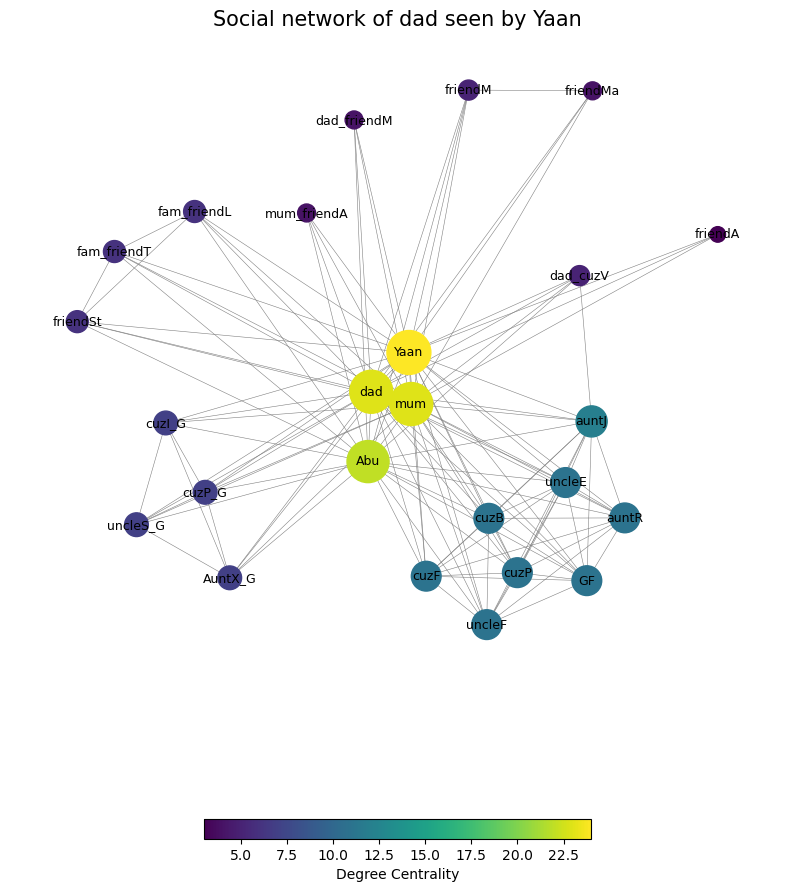

In [12]:
#we can plot the graph using the measure of degree:

fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(g_dad)
nx.draw_networkx_labels(g_dad, pos,font_size=9,
        font_color='black')
nx.draw_networkx_edges(g_dad, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_dad,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Social network of dad seen by Yaan",fontsize=15)
plt.show()

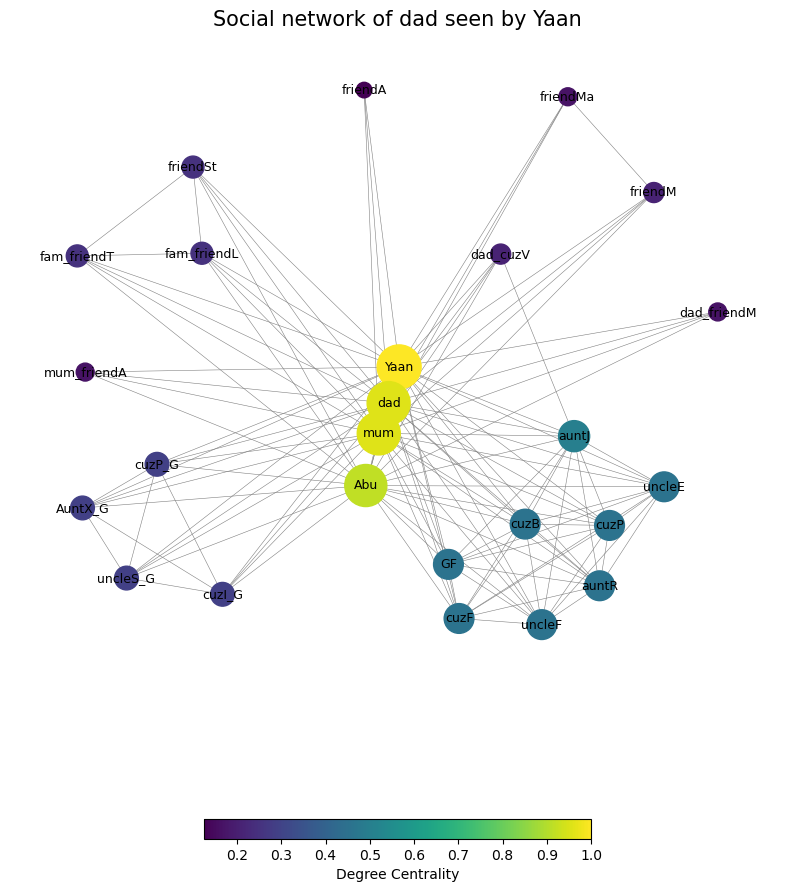

In [13]:
#  We can calculate the normalised version of degree centrality using networkx function:
deg_dad_norm =nx.degree_centrality(g_dad)


nx.set_node_attributes(g_dad,dict(deg_dad_norm),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in g_dad.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in g_dad.nodes(data=True)]


fig, ax = plt.subplots(figsize=(10,12))


pos=nx.spring_layout(g_dad)
nx.draw_networkx_edges(g_dad, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(g_dad, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(g_dad,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Social network of dad seen by Yaan",fontsize=15)
plt.show()


#Note that values now go from 0 to 1

In this plot we can see who is the most connected person, any surprises?

Now recall the previous section in which you learnt that there’s ‘in’ and ‘out’ degree. Who is more important?

What if instead of looking at the number of connections you have, you look at how important those connections are? –> __Eigenvector centrality__ More elaborated algorithms looking at not only the importance of the connections, but at the connections pointing to you, etc, are the ones used to rank internet pages for example, such as __Page Rank__.

## __Closeness centrality__

Let $d_{ij}$ be the geodesic distance (shortest path) between node $i$ and $j$. The mean geodesic distance of node $i$ to all other nodes is given by:

    
\begin{equation} l_{i}=\frac{1}{n} \sum_{j} d_{ij}\end{equation}
    
where $n$ is the total number of nodes.

A node that is very close to most nodes, and has hence low mean geodesic, will be more influential than a node which is far away. This gives rise to the following definition for the closeness centrality of node $i$:

\begin{equation} C_{i}= \frac{1}{l_{i}} = \frac{n}{\sum_{j} d_{ij}}\end{equation}

Let us compute the closeness centrality for each node in dad’s network.

In [14]:
# given that the network is weighted let us introduce the weights.
# as an initial trial, let us see what happens when we include the weights as the strength of the interaction
clos_dad_wrong=nx.closeness_centrality(g_dad, distance='weight')

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(g_dad,clos_dad_wrong,'closeness')

pd.DataFrame.from_dict(clos_dad_wrong,columns=['closeness'],orient='index')[0:10]

,closeness
Yaan,0.115385
dad,0.126984
mum,0.122449
Abu,0.140351
friendM,0.129032
dad_cuzV,0.083624
cuzF,0.083045
GF,0.086022
cuzB,0.083045
cuzI_G,0.086957


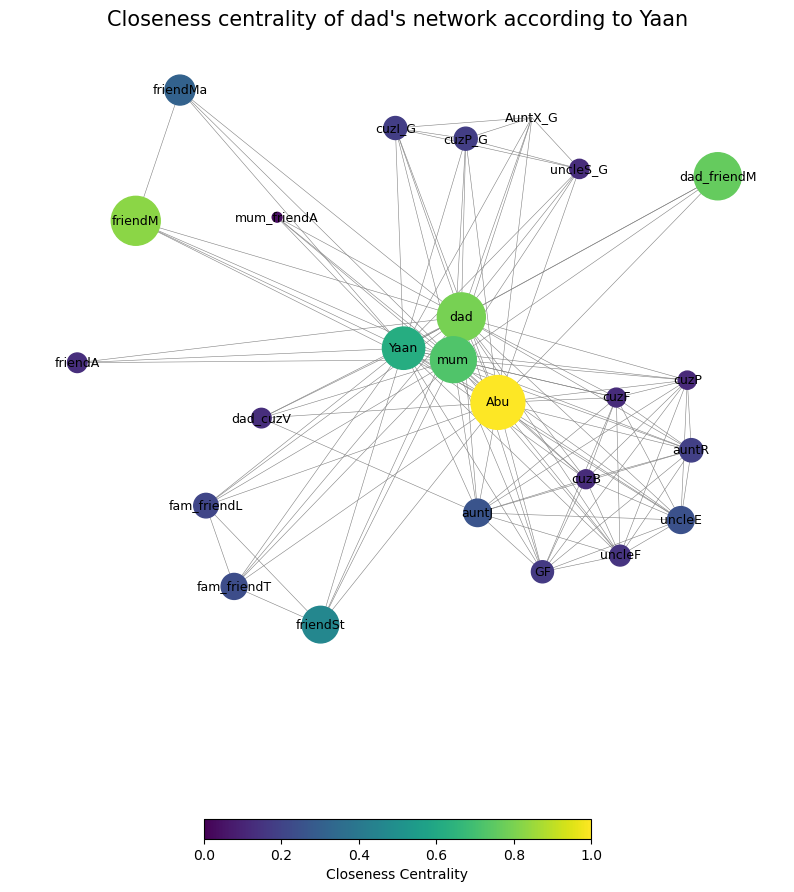

In [15]:
# Set color and size
clos_w_val=[(i[1]['closeness']) for i in g_dad.nodes(data=True)]


clos_w_dad_color=[((i[1]['closeness']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))) for i in g_dad.nodes(data=True)]
clos_w_dad_size=[((i[1]['closeness']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*1500) for i in g_dad.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(g_dad)
nx.draw_networkx_edges(g_dad, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(g_dad, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(g_dad,
        pos = pos,
        node_color= clos_w_dad_color,
        node_size=clos_w_dad_size )

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Closeness centrality of dad's network according to Yaan",fontsize=15)
plt.show()

This is wrong!!! Why? the reason is that the bigger the strength of the interaction the closer the person is. So the weights need to be inverted.

In [16]:
# Note that we have to invert the weights, since they are meant to represent a distance.
# the higher the value to closer they are
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in g_dad.edges(data='weight')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(g_dad, v_weights, 'v_weights')

# Print edge list with attributes
list(g_dad.edges(data = True))[0:10]

[('Yaan', 'dad', {'weight': 10, 'v_weights': 0.1}),
 ('Yaan', 'mum', {'weight': 10, 'v_weights': 0.1}),
 ('Yaan', 'Abu', {'weight': 10, 'v_weights': 0.1}),
 ('Yaan', 'friendM', {'weight': 10, 'v_weights': 0.1}),
 ('Yaan', 'dad_cuzV', {'weight': 9, 'v_weights': 0.1111111}),
 ('Yaan', 'cuzF', {'weight': 10, 'v_weights': 0.1}),
 ('Yaan', 'GF', {'weight': 9, 'v_weights': 0.1111111}),
 ('Yaan', 'cuzB', {'weight': 10, 'v_weights': 0.1}),
 ('Yaan', 'cuzI_G', {'weight': 10, 'v_weights': 0.1}),
 ('Yaan', 'cuzP_G', {'weight': 10, 'v_weights': 0.1})]

In [17]:
# Lets compute weighted closeness
clos_dad=nx.closeness_centrality(g_dad, distance='v_weights')

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(g_dad,clos_dad,'closeness')

pd.DataFrame.from_dict(clos_dad,columns=['closeness'],orient='index')[0:10]


,closeness
Yaan,8.611705
dad,7.510245
mum,7.704459
Abu,6.840855
friendM,4.759581
dad_cuzV,5.026178
cuzF,5.895886
GF,5.762195
cuzB,5.895886
cuzI_G,5.503185


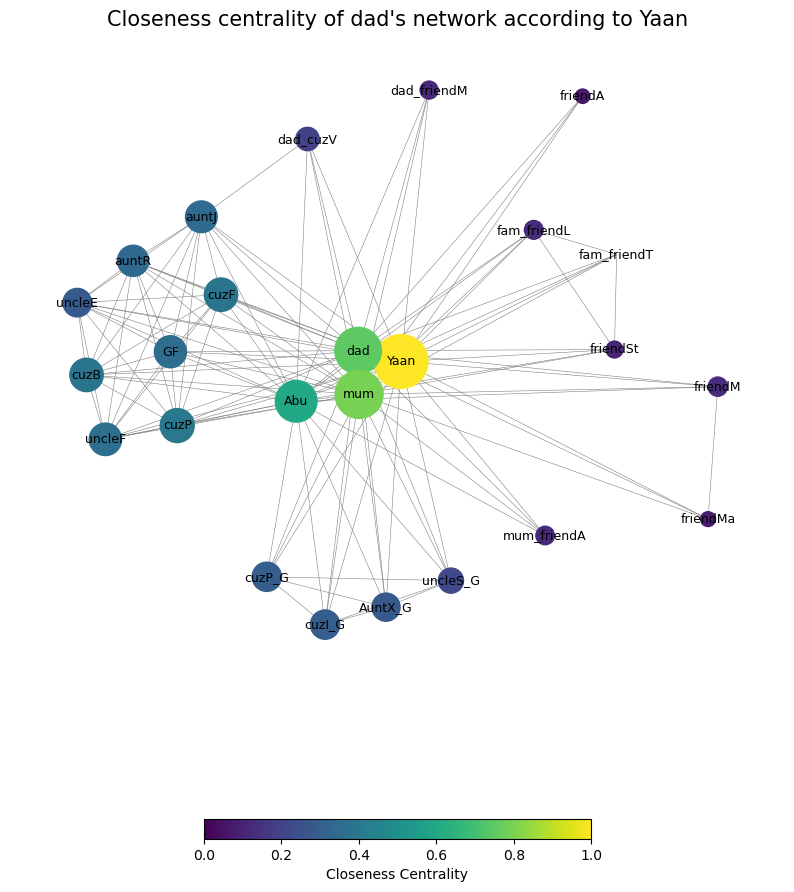

In [18]:
# Set color and size
clos_w_val=[(i[1]['closeness']) for i in g_dad.nodes(data=True)]


clos_w_dad_color=[((i[1]['closeness']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))) for i in g_dad.nodes(data=True)]
clos_w_dad_size=[((i[1]['closeness']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*1500) for i in g_dad.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(g_dad)
nx.draw_networkx_edges(g_dad, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(g_dad, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(g_dad,
        pos = pos,
        node_color= clos_w_dad_color,
        node_size=clos_w_dad_size )

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Closeness centrality of dad's network according to Yaan",fontsize=15)
plt.show()

__Topological Closeness Centrality__:

In [19]:
#topological closeness
clos_top_dad=nx.closeness_centrality(g_dad)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(g_dad,clos_top_dad,'closeness_top')

pd.DataFrame.from_dict(clos_top_dad,columns=['closeness_top'],orient='index')[0:10]


,closeness_top
Yaan,1.000000
dad,0.960000
mum,0.960000
Abu,0.923077
friendM,0.558140
dad_cuzV,0.558140
cuzF,0.648649
GF,0.648649
cuzB,0.648649
cuzI_G,0.585366


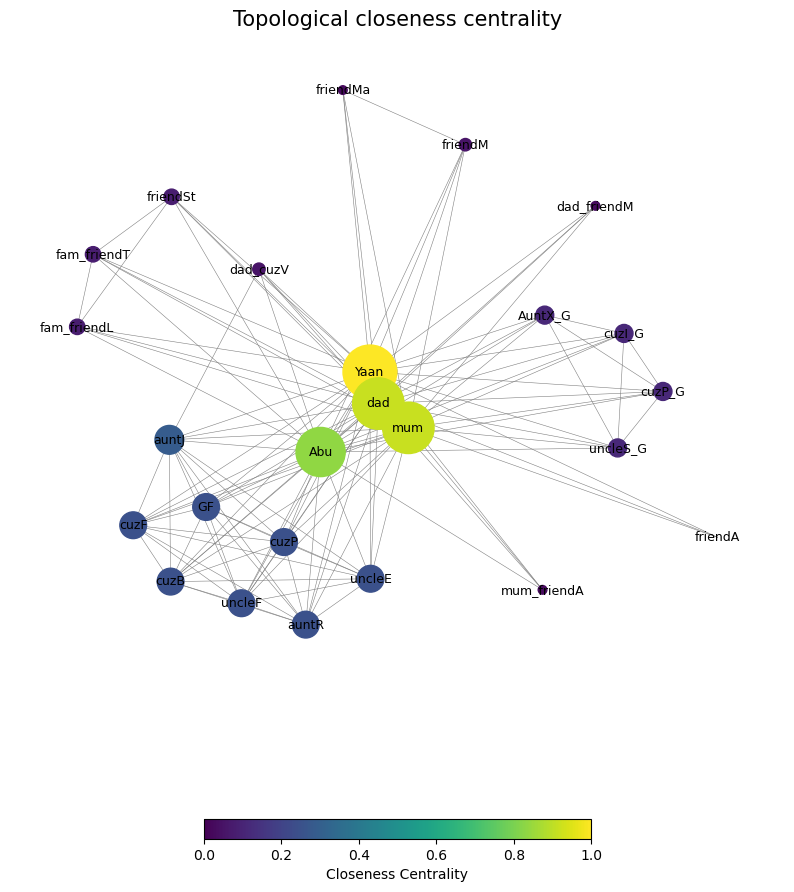

In [20]:
# Set color and size
# Closeness values
clos_val=[(i[1]['closeness_top']) for i in g_dad.nodes(data=True)]


normalised_clos_top_dad=[((i[1]['closeness_top']-min(clos_val))/(max(clos_val)-min(clos_val))) for i in g_dad.nodes(data=True)]
clos_top_dad_size=[((i[1]['closeness_top']-min(clos_val))/(max(clos_val)-min(clos_val))*1500) for i in g_dad.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(g_dad)
nx.draw_networkx_edges(g_dad, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(g_dad, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(g_dad,
        pos = pos,
        node_color= normalised_clos_top_dad,
        node_size=clos_top_dad_size )

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Topological closeness centrality",fontsize=15)
plt.show()

## __Betweenness centrality__

The betweenness centrality of a vertex corresponds to the number of shortest paths passing through it among all pairs. Edge betweennness is defined in a similar, where the edge is within the shortest path.

Define $n^{i}_{st}$ as:
    
\begin{equation}
n^{i}_{st}=\begin{cases}
1, & \text{if vertex $i$ lies on the geodesic path from $s$ to $t$}.\\
0, & \text{otherwise}.
  \end{cases}
\end{equation}



Then betweenness centrality can be defined as:
              
\begin{equation}x_{i}=\sum_{st} n^{i}_{st}\end{equation}

However, there may be multiple geodesics from $s$ to $t$ so to account for this we normalise by the number of geodesics from $s$ to $t$, $g_{st}$:

\begin{equation}x_{i}=\sum_{st} \frac {n^{i}_{st}}{g_{st}}\end{equation}

In [21]:
#Let us compute the betweenness centrality for the network 
bet_dad=nx.betweenness_centrality(g_dad,weight='weight', normalized=False)

pd.DataFrame.from_dict(bet_dad,columns=['betweenness'],orient='index')[0:10]

,betweenness
Yaan,12.750000
dad,35.750000
mum,18.083333
Abu,108.583333
friendM,9.833333
dad_cuzV,0.000000
cuzF,0.000000
GF,0.000000
cuzB,0.000000
cuzI_G,0.000000


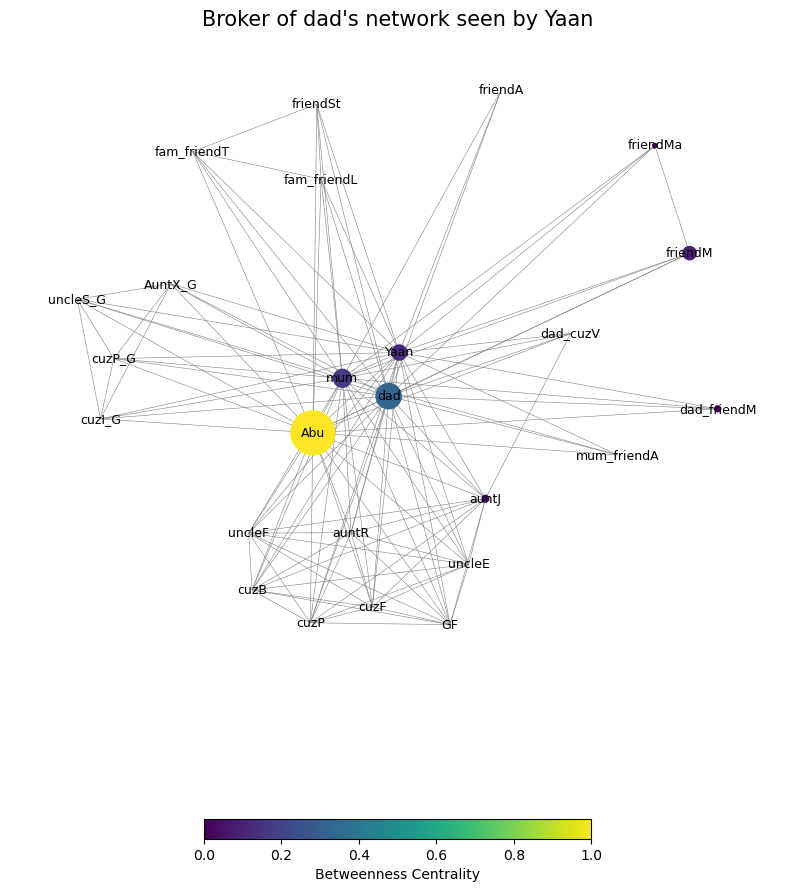

In [22]:
# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(g_dad,bet_dad,'betweenness')

# Lets set color and size of nodes according to betweenness values
betweenness_values=[(i[1]['betweenness']) for i in g_dad.nodes(data=True)]

bet_color=[(i[1]['betweenness']/max(betweenness_values)) for i in g_dad.nodes(data=True)]
bet_size=[(i[1]['betweenness']/max(betweenness_values)*1000) for i in g_dad.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(g_dad)
nx.draw_networkx_edges(g_dad, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(g_dad, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(g_dad,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Broker of dad's network seen by Yaan",fontsize=15)
plt.show()

This is a rather nice result: the grandma is the broker of the system!

Note that such a nice result fooled us.

__Exercise__: find why this result is incorrect, and what would you change to find the correct one.

Let us look at the topological betweenness and see whether we get any insights:

__Topological Betweenness Centrality__:

In [23]:
#Topological betweenness centrality for the network 
bet_dad_top=nx.betweenness_centrality(g_dad,normalized=False)
pd.DataFrame.from_dict(bet_dad_top,columns=['betweenness_top'],orient='index')[0:10]

,betweenness_top
Yaan,46.193478
dad,46.150000
mum,46.150000
Abu,32.943478
friendM,0.293478
dad_cuzV,0.043478
cuzF,0.043478
GF,0.043478
cuzB,0.043478
cuzI_G,0.043478


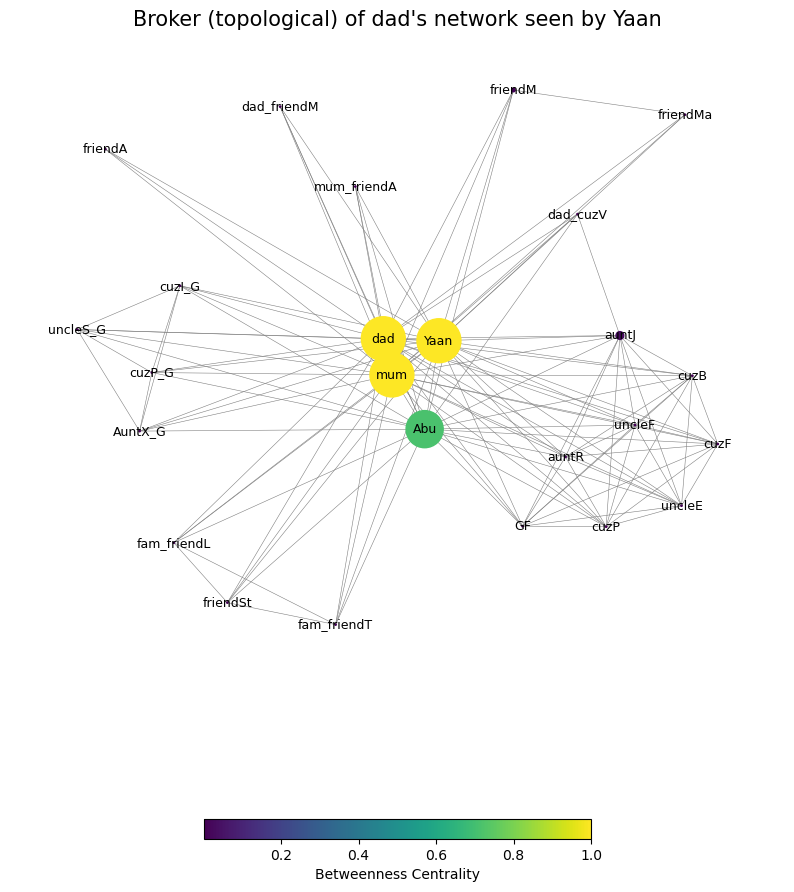

In [24]:
# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(g_dad,bet_dad_top,'betweenness_top')

betweenness_top_values=[(i[1]['betweenness_top']) for i in g_dad.nodes(data=True)]


# Lets set color and size of nodes according to betweenness values
bet_color_top=[(i[1]['betweenness_top']/max(betweenness_top_values)) for i in g_dad.nodes(data=True)]
bet_size_top=[(i[1]['betweenness_top']/max(betweenness_top_values)*1000) for i in g_dad.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(g_dad)
nx.draw_networkx_edges(g_dad, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(g_dad, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(g_dad,
        pos = pos,
        node_color= bet_color_top,
        node_size= bet_size_top)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Broker (topological) of dad's network seen by Yaan",fontsize=15)
plt.show()

In [25]:
# Print node list with attributes
list(g_dad.nodes(data = True))[0:5]

[('Yaan',
  {'degree': 24,
   'degree_norm': 1.0,
   'closeness': 8.611704900124675,
   'closeness_top': 1.0,
   'betweenness': 12.749999999999998,
   'betweenness_top': 46.19347826086957}),
 ('dad',
  {'degree': 23,
   'degree_norm': 0.9583333333333333,
   'closeness': 7.510244677825994,
   'closeness_top': 0.96,
   'betweenness': 35.75,
   'betweenness_top': 46.150000000000006}),
 ('mum',
  {'degree': 23,
   'degree_norm': 0.9583333333333333,
   'closeness': 7.704458759685507,
   'closeness_top': 0.96,
   'betweenness': 18.083333333333332,
   'betweenness_top': 46.150000000000006}),
 ('Abu',
  {'degree': 22,
   'degree_norm': 0.9166666666666666,
   'closeness': 6.8408549768958675,
   'closeness_top': 0.9230769230769231,
   'betweenness': 108.58333333333333,
   'betweenness_top': 32.94347826086957}),
 ('friendM',
  {'degree': 5,
   'degree_norm': 0.20833333333333331,
   'closeness': 4.7595814439943425,
   'closeness_top': 0.5581395348837209,
   'betweenness': 9.833333333333332,
   'be

There are 2 lessons to learn from this:

* assigning arbitrary numbers to relationships can lead to misleading results

* we need to be careful when using weights: what are they encoding? how are they representing the system? how can we integrate them correctly?